In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [4]:
df = pd.read_csv("data_NKE.csv")   # change dataset name

In [5]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,86.89,87.2428,86.4388,86.83,5034931,2019-04-15,85.2413,2019-04-15,59.8176,2019-04-15,63.0401
1,1,2019-04-12,85.30,86.4900,85.2900,86.24,6037028,2019-04-12,84.9968,2019-04-12,57.3400,2019-04-12,65.1201
2,2,2019-04-11,84.90,85.0500,84.2837,85.00,3347649,2019-04-11,84.8056,2019-04-11,51.5046,2019-04-11,51.1315
3,3,2019-04-10,84.64,85.0100,84.5600,84.88,3918379,2019-04-10,84.7757,2019-04-10,50.9010,2019-04-10,42.2498
4,4,2019-04-09,84.22,84.6000,83.9700,84.28,3804527,2019-04-09,84.7596,2019-04-09,47.8901,2019-04-09,45.8222


In [6]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    86.83
1    86.24
2    85.00
3    84.88
4    84.28
Name: close, dtype: float64

In [7]:
len(close)

5341

In [8]:
train = close.loc[:len(close) - int(len(close)*0.15) -1]
test = close.loc[len(close) - int(len(close)*0.15):]
print(train.tail())
print(test.head())

4535    39.41
4536    41.19
4537    40.55
4538    40.23
4539    39.73
Name: close, dtype: float64
4540    39.95
4541    39.59
4542    40.47
4543    39.81
4544    40.20
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

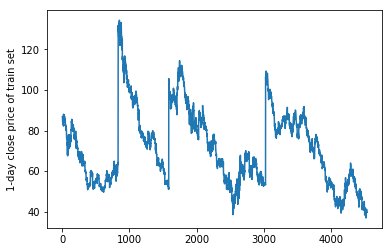

In [9]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

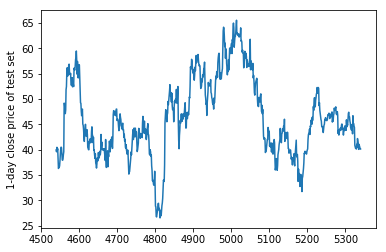

In [10]:
test.plot()
plt.ylabel('1-day close price of test set')

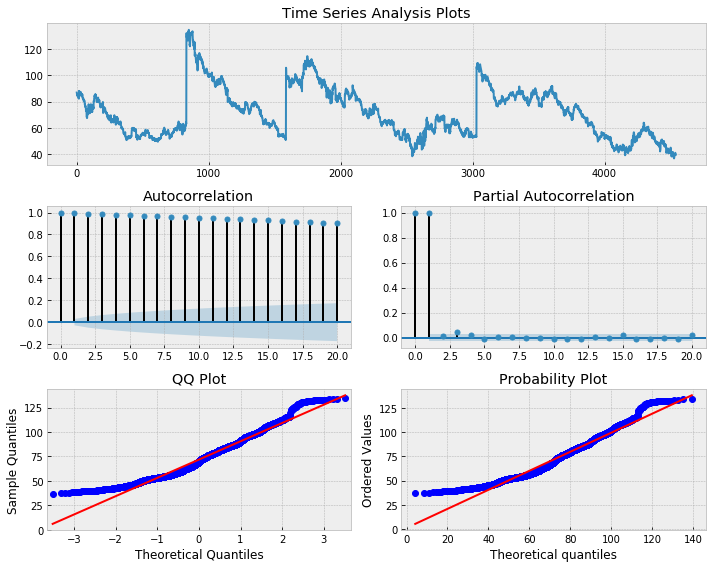

In [11]:
tsplot(train, lags=20)

In [12]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-2.9532373093809645,
 0.03949826935475561,
 3,
 4536,
 {'1%': -3.431792461304648, '5%': -2.8621773975678, '10%': -2.567109289962098},
 18544.75851008229)

Text(0,0.5,'Difference in 1-day close price')

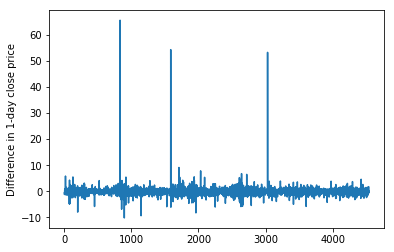

In [13]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [14]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-41.137077623258335,
 0.0,
 2,
 4536,
 {'1%': -3.431792461304648, '5%': -2.8621773975678, '10%': -2.567109289962098},
 18548.17931831574)

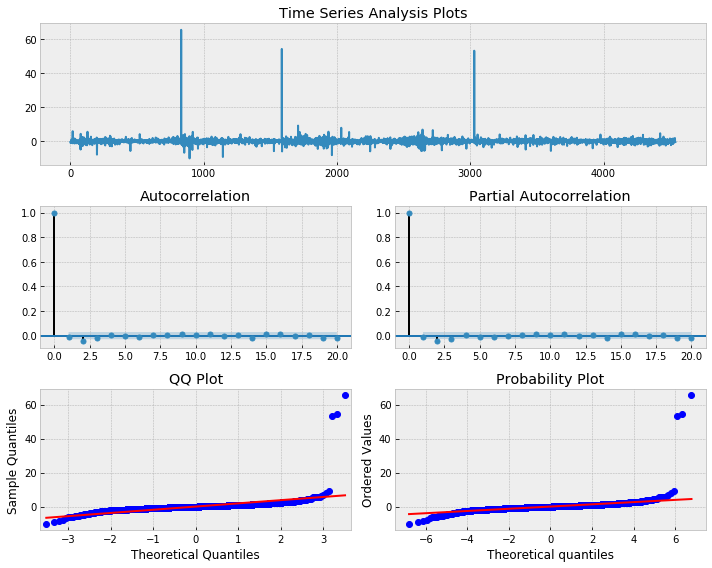

In [15]:
tsplot(train_diff, lags=20)

### Fit Model

In [16]:
arima010 = smt.ARIMA(train, (0,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima010_fit = arima010.fit() #change model name*2
arima010_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -9315.173
Method:                           css   S.D. of innovations              1.884
Date:                Wed, 17 Apr 2019   AIC                          18634.345
Time:                        15:29:05   BIC                          18647.186
Sample:                             1   HQIC                         18638.868
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0104      0.028     -0.371      0.711      -0.065       0.044
==============================================================================
"""

In [18]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -9314.868
Method:                       css-mle   S.D. of innovations              1.884
Date:                Wed, 17 Apr 2019   AIC                          18635.736
Time:                        15:30:15   BIC                          18654.997
Sample:                             1   HQIC                         18642.520
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0104      0.028     -0.375      0.707      -0.065       0.044
ar.L1.D.close    -0.0116      0.015     -0.781      0.435      -0.041       0.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -86.3090           +0.0000j           86.3090            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
arima100 = smt.ARIMA(train, (1,0,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima100_fit = arima100.fit() #change model name*2
arima100_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 4540
Model:                     ARMA(1, 0)   Log Likelihood               -9314.200
Method:                       css-mle   S.D. of innovations              1.882
Date:                Wed, 17 Apr 2019   AIC                          18634.401
Time:                        15:29:44   BIC                          18653.663
Sample:                             0   HQIC                         18641.185
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          71.0765      5.450     13.041      0.000      60.394      81.759
ar.L1.close     0.9951      0.001    681.131      0.000       0.992       0.998
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0049           +0.0000j            1.0049            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

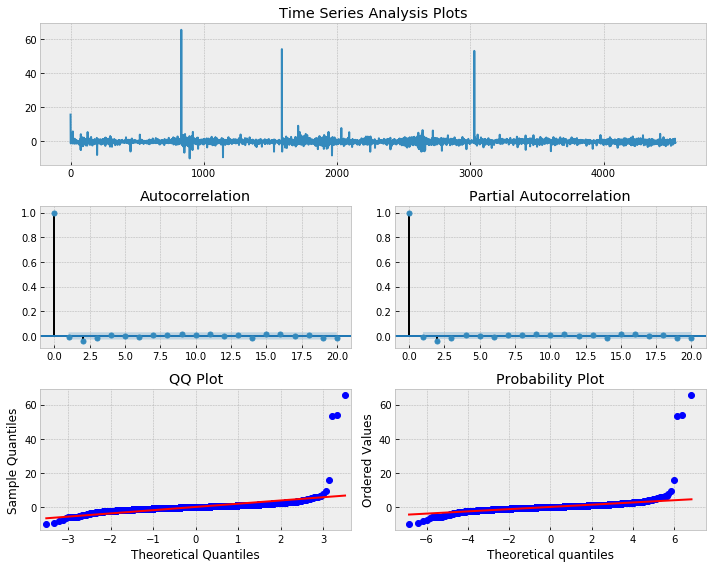

In [24]:
tsplot(arima100_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [25]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima100_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([10.60081878]), array([0.05989487]))

### Forecasting

In [26]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima100_fit.forecast(steps=num_steps)   #change model name

In [27]:
arima100_fit.forecast(steps=num_steps)   #change model name

(array([39.88398308, 40.03720975, 40.18968373, 40.34140871, 40.49238837]),
 array([1.88162933, 2.6544979 , 3.24312049, 3.73567663, 4.16641821]),
 array([[36.19605735, 43.57190881],
        [34.83448947, 45.23993003],
        [33.83328438, 46.54608308],
        [33.01961705, 47.66320036],
        [32.32635873, 48.658418  ]]))

In [28]:
arima100_fit.forecast(steps=num_steps)[0][4]    #change model name

40.492388365915325

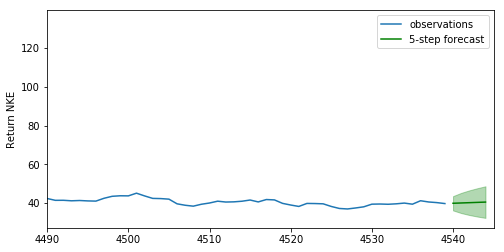

In [29]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return NKE')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [30]:
pred = []
for i in range(int(len(close)*0.15)): 
    moving_train = close.loc[:len(close) - int(len(close)*0.15) -5 + i]
    moving_arima100 = smt.ARIMA(moving_train, (1,0,0))   #change model parameters  & model name
    moving_arima100_fit = moving_arima100.fit()   #change model name*2
    
    pred.append(moving_arima100_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

801

In [31]:
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9857575073451811
MAE = 2.4304635783027932
RMSE = 3.188835698783637
Scaled MAE = 0.06241560293535679
Scaled RMSE = 0.08189100407764861
